In [100]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [101]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [102]:
crime = pd.read_csv("C:\dta\crime_data.csv")
crime.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [103]:
 #Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [104]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])

In [105]:
Z = linkage(df_norm, method = 'ward')


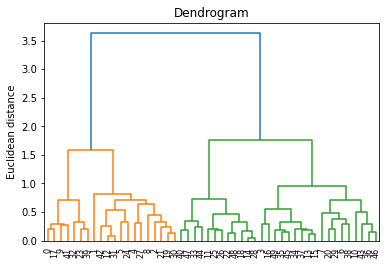

In [106]:
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [107]:
agg_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')


In [108]:
y_hc = agg_clustering.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [109]:
crime2=pd.concat([crime,Clusters],axis=1)

In [111]:
crime3 = pd.get_dummies(crime2, columns=['Clusters'])

In [112]:
crime3 = crime2.sort_values(by='Clusters')

In [113]:
from sklearn.cluster import KMeans

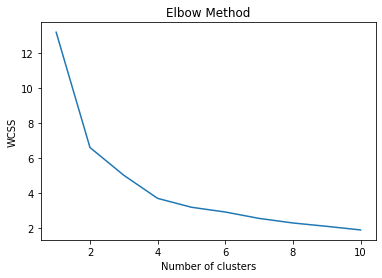

In [114]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [116]:
clusters_new.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [117]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [118]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [119]:
clusters_new.cluster_centers_

array([[0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [120]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294
1,1,13.937500,243.625000,53.750000,21.412500
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.966667,264.000000,76.500000,33.608333


In [121]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [122]:
neigh=NearestNeighbors(n_neighbors=7)
nbrs=neigh.fit(df_norm)
distances,indices=nbrs.kneighbors(df_norm)

NameError: name 'plot' is not defined

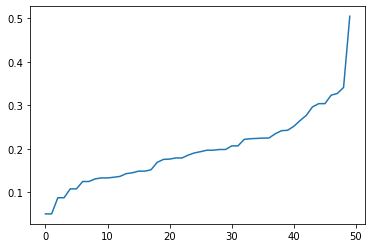

In [123]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plot.show()

In [124]:
dbscan = DBSCAN(eps=.3, min_samples=6)
dbscan.fit(df_norm)

DBSCAN(eps=0.3, min_samples=6)

In [125]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [126]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [127]:
pd.concat([crime,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,1,-1
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,3,-1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,3,-1
5,Colorado,7.9,204,78,38.7,3,-1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,3,-1
9,Georgia,17.4,211,60,25.8,1,-1
